In [97]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import skimage
import time

In [74]:
# remove alpha, 
# remove some points with decay
# make turn like points fixed
# add progressive parameteres based on likelihood

In [75]:
img = cv2.cvtColor(cv2.imread('print.jpg'), cv2.COLOR_BGR2RGB) / 255.0
mask_img = np.zeros(img.shape)

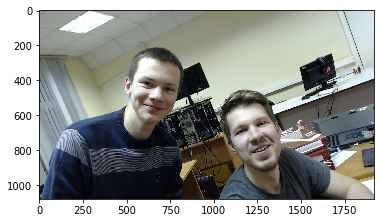

In [76]:
plt.imshow(img)

In [102]:
class Stroke():
    def __init__(self, image, dispersion, amount):
        image_size = image.shape[:2]
        max_size = max(image_size)
        self.dispersion = dispersion
#         self.mask_img = np.zeros(img.shape)
        x = np.random.randint(0, image_size[1], 1)
        y = np.random.randint(0, image_size[0], 1)
        self.positions = np.concatenate([x, y], axis=0)
        self.positions = self.positions.reshape(1, 2).repeat(amount, axis=0)
        self.positions = self.positions + np.random.randn(amount, 2) * (dispersion*2)
        self.angle = np.random.uniform(0, 2 * np.pi)
        self.rotation = np.random.uniform(-np.pi/30, np.pi/30)
        self.color = image[y, x]
        self.speed = np.random.normal(max_size/200, 5, 1)
        self.alpha = 2
        self.status = 'running'
        
        
    def get_mean_color(self, image, x, y):
        image_size = image.shape[:2]
        left = int(y - self.dispersion)
        right = int(y + self.dispersion)
        top = int(x - self.dispersion)
        down = int(x + self.dispersion)
        if left < 0:
            left = 0
        if left >= image_size[0]:
            left = image_size[0] - 1
        if right < 0:
            right = 0
        if right >= image_size[0]:
            right = image_size[0] - 1
        if top < 0:
            top = 0
        if top >= image_size[1]:
            top = image_size[1] - 1
        if down < 0:
            down = 0
        if down >= image_size[1]:
            down = image_size[1] - 1
        if right - left > 0 and down - top > 0:
            return np.mean(image[left: right, top: down], axis=(0,1))
        else:
            return self.color
        
        
    def update(self, image):
        x, y = self.positions.mean(axis=0)
        # add removal of some points
        self.last_pos = self.positions.copy()
        self.positions[:, 0] += np.cos(self.angle) * self.speed
        self.positions[:, 1] += np.sin(self.angle) * self.speed
        self.angle += self.rotation
        self.color = self.color - (self.color - self.get_mean_color(image, x, y))/3
        self.alpha -= np.random.uniform(0, 0.1)
        if self.alpha <= 0:
            self.status = 'deleted'
        
    def draw(self, image):
#         prev = time.time()
        points = np.concatenate([self.last_pos.reshape(-1, 1, 2), self.positions.reshape(-1, 1, 2)], axis=1).astype(np.int32)
        cv2.polylines(image, points, False, self.color[0], 5)
#         print('polylines: {} ms'.format((time.time()-prev)*1000))
#         for i in range(self.positions.shape[0]):
#             rr, cc, val = skimage.draw.line_aa(int(self.last_pos[i][0]), int(self.last_pos[i][1]), int(self.positions[i][0]), int(self.positions[i][1]))
#             mask = (rr >= 0) & (rr < image.shape[1])
#             rr = rr[mask]
#             cc = cc[mask]
#             val = val[mask]
#             mask = (cc >= 0) & (cc < image.shape[0])
#             rr = rr[mask]
#             cc = cc[mask]
#             val = val[mask]
#             color = np.repeat((val).reshape(-1, 1), 3, axis=1) * self.color
#             alpha = 1 if self.alpha > 1 else self.alpha
#             image[cc, rr, :] = (image[cc, rr, :] * (1 - alpha) + color * alpha) / 2
#             print(self.color)
#             cv2.line(image, tuple(map(int, self.last_pos[i])), tuple(map(int, self.positions[i])), self.color[0], 2)
#         print('lines: {} ms'.format((time.time()-prev)*1000))
    

In [ ]:
strokes = [Stroke(img, np.random.randint(1, 8), np.random.randint(1, 20)) for _ in range(100)]

while True:
    strokes = [st for st in strokes if st.status != 'deleted']
    for _ in range(100 - len(strokes)):
        strokes.append(Stroke(img, np.random.randint(1, 8), np.random.randint(1, 20)))
    for st in strokes:
        st.update(img)
        st.draw(mask_img)
        
    out_img = cv2.cvtColor((mask_img*255).astype(np.uint8), cv2.COLOR_RGB2BGR)
    cv2.imshow('BlindArtist', out_img)
#     print(np.sum((out_img - img*255) ** 2) / (img.shape[0] * img.shape[1]))
    key = cv2.waitKey(1)
    if key == 27:
        break
        
cv2.destroyAllWindows() 

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


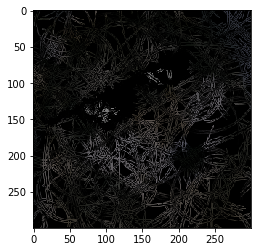

In [82]:
stroke.update(img)
stroke.draw(mask_img)
plt.imshow(mask_img)

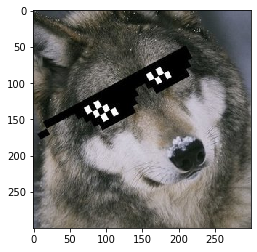

In [291]:
plt.imshow(img)